**Welcome to pyLIMA (v2) tutorial 1!**

In this tutorial you will learn how pyLIMA works by fitting a simulated data set.

We will cover how to read in data files, call different fitting routines and how to make plots.

Please take some time to familiarize yourself with the pyLIMA documentation.

In [1]:
### Import the required libraries.
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import os, sys

from pyLIMA import event
from pyLIMA import telescopes

In [2]:
### Create a new EVENT object and give it a name.
your_event = event.Event()
your_event.name = 'My event name'

You now need to associate some data sets with this **EVENT**. 

For this example, you will use simulated I-band data sets from two telescopes, OGLE and LCO.

The data sets are pre-formatted: column 1 is the date, column 2 the magnitude and column 3 the uncertainty in the magnitude.

In [3]:
### Load up the data
data_1 = np.loadtxt('./Survey_1.dat')
telescope_1 = telescopes.Telescope(name = 'OGLE', 
                                   camera_filter = 'I',
                                   light_curve = data_1.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])

data_2 = np.loadtxt('./Followup_1.dat')
telescope_2 = telescopes.Telescope(name = 'LCO', 
                                   camera_filter = 'I',
                                   light_curve = data_2.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])

In [4]:
### Append these two telescope data sets to your EVENT object.
your_event.telescopes.append(telescope_1)
your_event.telescopes.append(telescope_2)

In [5]:
### Define the survey telescope that you want to use to align all other data sets to.
### We recommend using the data set with the most measurements covering the gretest 
### time span of observations:
your_event.find_survey('OGLE')

In [6]:
### Run a quick sanity check on your input.
your_event.check_event()

check_event  : Everything looks fine...


Next, construct the **MODEL** you want to fit and link it to the **EVENT** you prepared. 

Let's go with a basic PSPL, without second order effects:

In [7]:
from pyLIMA.models import PSPL_model
pspl = PSPL_model.PSPLmodel(your_event)

Let's try fitting the event with a simple Levenvberg_Marquardt (LM) algorithm.

Define the **FITTING ALGORITHM** you want to use for the **MODEL** you prepared.

For more information about the models and fitting algorithms available please consult the pyLIMA documentation.

In [8]:
from pyLIMA.fits import LM_fit

Initialize the fit by declaring a simple **FIT** object using the **MODEL** you defined:

In [9]:
my_fit = LM_fit.LMfit(pspl)

Before we run it, let's have a look at the initial fit parameters:

In [10]:
my_fit.fit_parameters

OrderedDict([('t0', [0, [1.0, 182.32999999999993]]),
             ('u0', [1, (0.0, 1.0)]),
             ('tE', [2, (0.1, 500)]),
             ('fsource_OGLE', [3, (0, 257268.11445883513)]),
             ('fblend_OGLE', [4, (-257268.11445883513, 257268.11445883513)]),
             ('fsource_LCO', [5, (0, 8534180.293895919)]),
             ('fblend_LCO', [6, (-8534180.293895919, 8534180.293895919)])])

Now fit the **MODEL** to the **EVENT**. This may take a few seconds.

In [11]:
my_fit.fit()

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [82.97302040756485, 0.012201973710850926, 16.242748823204337, 349.54105924401074, 4499.294411975956, 0, 8534180.293895919]
fit  : Levenberg-Marquardt fit SUCCESS
best_model: [80.84331825648763, 0.00015777193315456373, 194.14835416920704, 32.81643511883657, 3717.351090353594, -172.2868952189836, 8534178.428160219]  chi2: 7971965.997656649


You can now recall the fit results on the screen by executing:

In [12]:
my_fit.fit_results

{'best_model': [80.84331825648763,
  0.00015777193315456373,
  194.14835416920704,
  32.81643511883657,
  3717.351090353594,
  -172.2868952189836,
  8534178.428160219],
 'chi2': 7971965.997656649,
 'fit_time': 0.14884591102600098,
 'covariance_matrix': array([[ 1.17343287e-03,  1.89545110e-06, -8.91047007e-01,
          4.11739046e-02,  6.96335766e-01,  9.74671909e-01,
          7.88418123e-04],
        [ 1.89545110e-06,  1.36995253e-08,  1.31477177e-03,
         -3.68162672e-04,  1.04038480e-03, -1.58140203e-03,
         -1.19619781e-06],
        [-8.91047007e-01,  1.31477177e-03,  2.16323555e+03,
         -2.71339730e+02, -5.99771720e+02, -2.44356123e+03,
         -1.93272816e+00],
        [ 4.11739046e-02, -3.68162672e-04, -2.71339730e+02,
          4.66712157e+01, -9.73704843e+00,  3.12388256e+02,
          2.43777524e-01],
        [ 6.96335766e-01,  1.04038480e-03, -5.99771720e+02,
         -9.73704843e+00,  2.84901782e+03,  5.51182546e+02,
          5.38031931e-01],
        [ 9.7

You can now recall any entry in the output dictionary by using the appropriate key.

For example, if you want to see the best fit results, you can access them like this:

In [13]:
my_fit.fit_results['best_model']

[80.84331825648763,
 0.00015777193315456373,
 194.14835416920704,
 32.81643511883657,
 3717.351090353594,
 -172.2868952189836,
 8534178.428160219]

If you don't remember which parameter each entry represents, you can always access the descriptions from fit_parameters.

In [14]:
my_fit.fit_parameters.keys()

odict_keys(['t0', 'u0', 'tE', 'fsource_OGLE', 'fblend_OGLE', 'fsource_LCO', 'fblend_LCO'])

Let's see some plots. Import the pyLIMA plotting tools.

/home/Tux/ytsapras/Installed_Programs/anaconda3/envs/pylima2/lib/python3.9/site-packages/pyLIMA-0.8.3-py3.9.egg/pyLIMA/telescopes.py:237: RuntimeWarning: divide by zero encountered in divide
  inv_err_flux = 1.0/err_flux
/home/Tux/ytsapras/Installed_Programs/anaconda3/envs/pylima2/lib/python3.9/site-packages/pyLIMA-0.8.3-py3.9.egg/pyLIMA/toolbox/plots.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  figure_axe.errorbar(time, mag, mag_error, fmt='.', color=color, marker=marker, label=name)


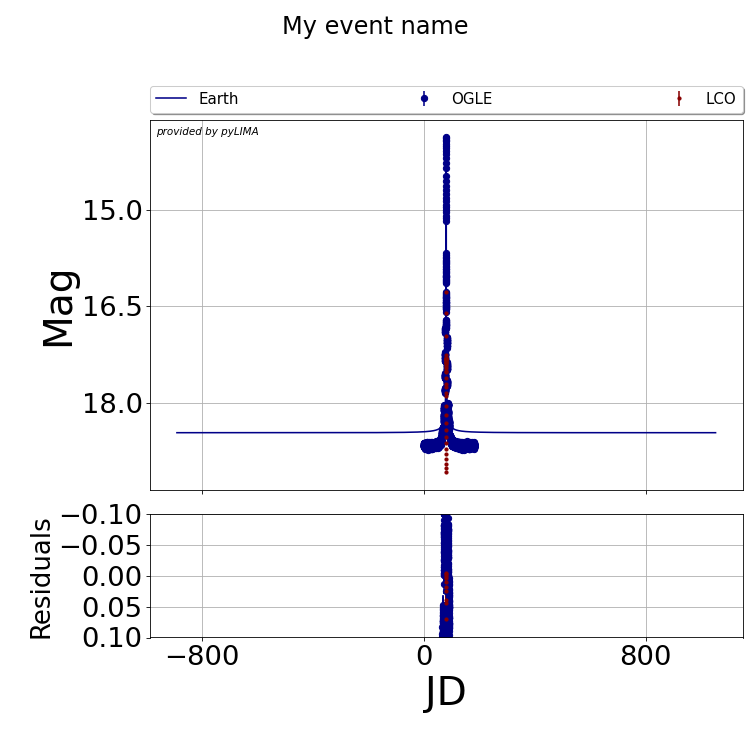

In [15]:
from pyLIMA.outputs import pyLIMA_plots
pyLIMA_plots.plot_lightcurves(pspl, my_fit.fit_results['best_model'])
plt.show()

Let's try another fit with the differential evolution (DE) algorithm.

This will take longer... 

In [16]:
from pyLIMA.fits import DE_fit
my_fit2 = DE_fit.DEfit(pspl)
my_fit2.fit()

differential_evolution step 1: f(x)= 2.66522e+06
differential_evolution step 2: f(x)= 2.66498e+06
differential_evolution step 3: f(x)= 2.66498e+06
differential_evolution step 4: f(x)= 2.66498e+06
differential_evolution step 5: f(x)= 2.63067e+06
differential_evolution step 6: f(x)= 2.20911e+06
differential_evolution step 7: f(x)= 2.20911e+06
differential_evolution step 8: f(x)= 2.20911e+06
differential_evolution step 9: f(x)= 2.20911e+06
differential_evolution step 10: f(x)= 2.20911e+06
differential_evolution step 11: f(x)= 2.20911e+06
differential_evolution step 12: f(x)= 2.20911e+06
differential_evolution step 13: f(x)= 2.20911e+06
differential_evolution step 14: f(x)= 2.20911e+06
differential_evolution step 15: f(x)= 2.20911e+06
differential_evolution step 16: f(x)= 2.20911e+06
differential_evolution step 17: f(x)= 2.20911e+06
differential_evolution step 18: f(x)= 2.20911e+06
differential_evolution step 19: f(x)= 2.20911e+06
differential_evolution step 20: f(x)= 2.20911e+06
different

Look at the results:

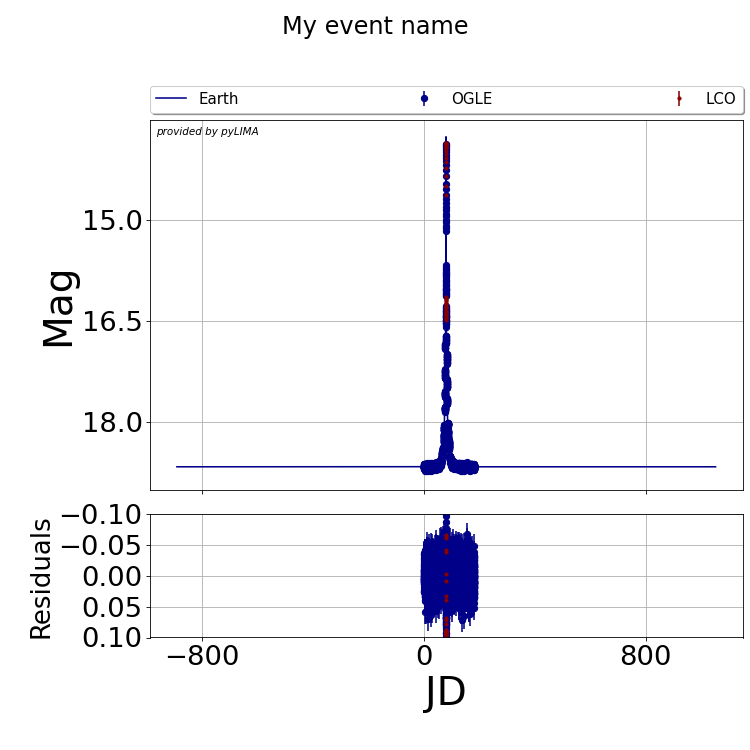

In [17]:
pyLIMA_plots.plot_lightcurves(pspl, my_fit2.fit_results['best_model'])
plt.show()

You can use the Zoom-in function to look at the peak if you are using an interactive python shell.

There is strong evidence of finite source effects in this event, so let's try to fit this.

You will need to import the FSPL MODEL to do this:

In [18]:
from pyLIMA.models import FSPL_model
fspl = FSPL_model.FSPLmodel(your_event)

You can still use the **FITTING ALGORITHM** that you imported previously. 

Let's just use DE_fit for this:

In [19]:
my_fit3 = DE_fit.DEfit(fspl)
my_fit3.fit()

differential_evolution step 1: f(x)= 2.66306e+06
differential_evolution step 2: f(x)= 2.66306e+06
differential_evolution step 3: f(x)= 2.66306e+06
differential_evolution step 4: f(x)= 2.66306e+06
differential_evolution step 5: f(x)= 2.66306e+06
differential_evolution step 6: f(x)= 2.56452e+06
differential_evolution step 7: f(x)= 2.50772e+06
differential_evolution step 8: f(x)= 2.50772e+06
differential_evolution step 9: f(x)= 2.50772e+06
differential_evolution step 10: f(x)= 2.50772e+06
differential_evolution step 11: f(x)= 2.40925e+06
differential_evolution step 12: f(x)= 2.40925e+06
differential_evolution step 13: f(x)= 2.40925e+06
differential_evolution step 14: f(x)= 2.40925e+06
differential_evolution step 15: f(x)= 2.40925e+06
differential_evolution step 16: f(x)= 2.40925e+06
differential_evolution step 17: f(x)= 2.40925e+06
differential_evolution step 18: f(x)= 2.40925e+06
differential_evolution step 19: f(x)= 2.40925e+06
differential_evolution step 20: f(x)= 2.40925e+06
different

Let's see some plots. In the interactive Python shell, you can zoom close to the peak to see what is going on.

/home/Tux/ytsapras/Installed_Programs/anaconda3/envs/pylima2/lib/python3.9/site-packages/pyLIMA-0.8.3-py3.9.egg/pyLIMA/toolbox/plots.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  figure_axe.errorbar(time, mag, mag_error, fmt='.', color=color, marker=marker, label=name)


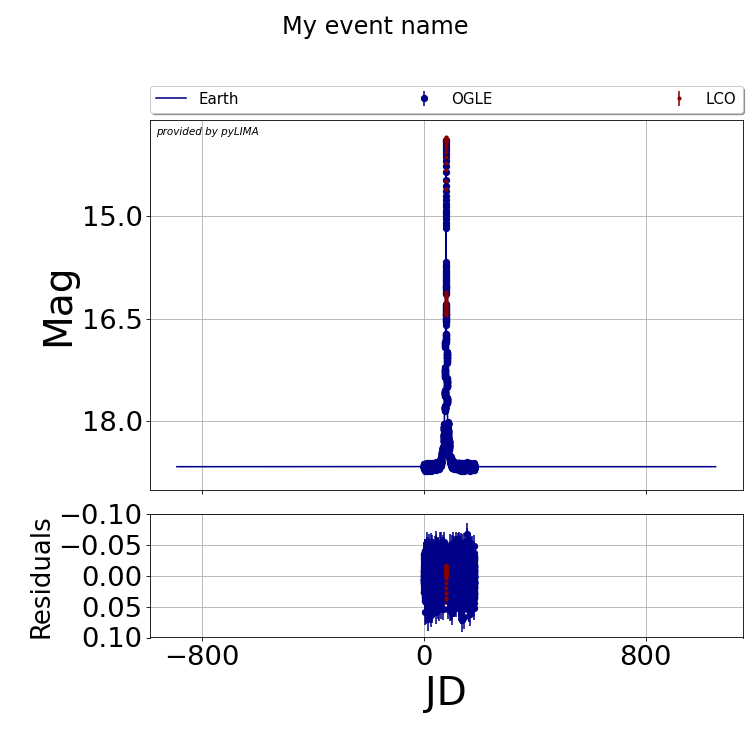

In [20]:
pyLIMA_plots.plot_lightcurves(fspl, my_fit3.fit_results['best_model'])
plt.show()

There is evidently still some structure in the residuals. Could be some limb darkening going on!

Let's try to fit for it. 

Set the microlensing limb-darkening coefficients (gamma) for each telescope:

In [21]:
your_event.telescopes[0].gamma = 0.5
your_event.telescopes[1].gamma = 0.5

Fit again:

In [22]:
my_fit4 = DE_fit.DEfit(fspl)
my_fit4.fit()

differential_evolution step 1: f(x)= 2.66523e+06
differential_evolution step 2: f(x)= 2.66523e+06
differential_evolution step 3: f(x)= 2.66523e+06
differential_evolution step 4: f(x)= 2.66356e+06
differential_evolution step 5: f(x)= 2.66341e+06
differential_evolution step 6: f(x)= 2.66341e+06
differential_evolution step 7: f(x)= 2.66341e+06
differential_evolution step 8: f(x)= 2.66341e+06
differential_evolution step 9: f(x)= 2.66341e+06
differential_evolution step 10: f(x)= 2.66332e+06
differential_evolution step 11: f(x)= 2.66332e+06
differential_evolution step 12: f(x)= 2.66332e+06
differential_evolution step 13: f(x)= 2.19829e+06
differential_evolution step 14: f(x)= 2.19829e+06
differential_evolution step 15: f(x)= 2.19762e+06
differential_evolution step 16: f(x)= 2.19762e+06
differential_evolution step 17: f(x)= 2.19762e+06
differential_evolution step 18: f(x)= 2.19762e+06
differential_evolution step 19: f(x)= 2.19762e+06
differential_evolution step 20: f(x)= 2.19762e+06
different

And plot it. Then zoom at the peak again.

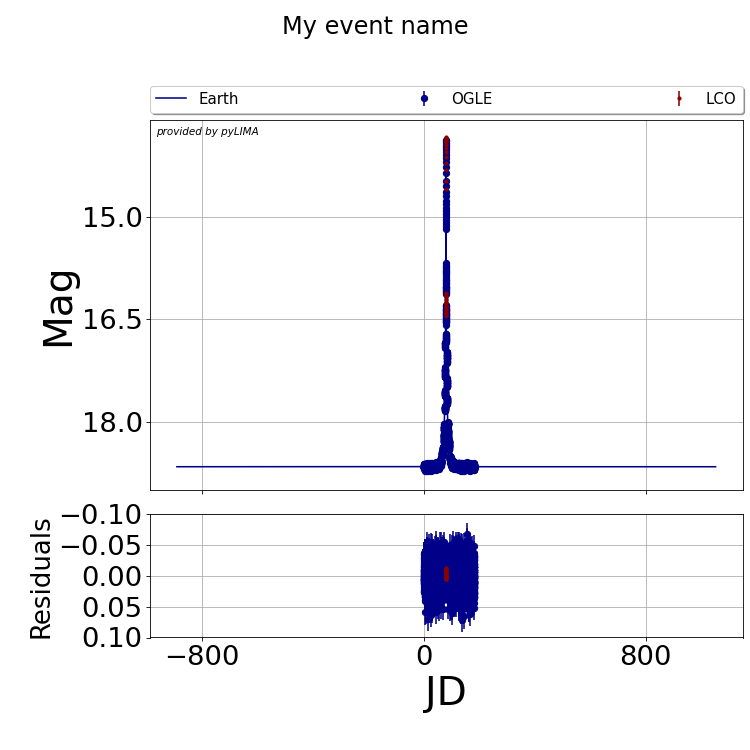

In [23]:
pyLIMA_plots.plot_lightcurves(fspl, my_fit4.fit_results['best_model'])
plt.show()

You can use the results of a previous good fit as initial guesses for the parameters in another fit:


In [24]:
guess_parameters = my_fit4.fit_results['best_model']
print(guess_parameters)

[7.99308316e+01 8.16471927e-03 1.01074114e+01 2.26095347e-02]


These parameter guesses can now be used to start an MCMC run, for example.

Using MCMC is recommended when you want to explore the posterior distribution of the parameters.

Let's fit again using MCMC. This might take some time ...

In [25]:
from pyLIMA.fits import MCMC_fit
my_fit5 = MCMC_fit.MCMCfit(fspl)
my_fit5.model_parameters_guess = guess_parameters
my_fit5.fit()

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [79.93083157821192, 0.008164719265287527, 10.10741135262324, 0.02260953468951314]


100%|██████████| 5000/5000 [01:01<00:00, 81.83it/s]

fit  : Monte Carlo Markov Chain (Affine Invariant) fit SUCCESS
best_model: [7.99308362e+01 8.16810962e-03 1.01071527e+01 2.26099915e-02] ln(likelihood) -20413.66988608033


Now your MCMC run is complete. Congratulations! 

You can now plot the chains and explore how they evolve for each parameter.

For example, to see how the chains for u0 evolve, do:

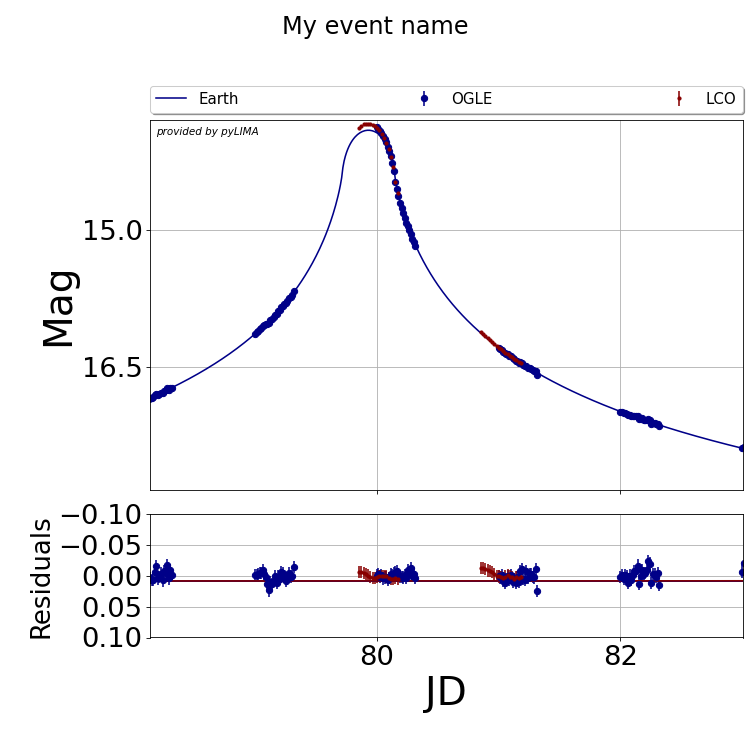

In [26]:
plt.plot(my_fit5.fit_results['MCMC_chains'][:,:,1])
plt.show()


The first part in the slice [:,:,1] represents the iteration number, the second the chain number and the last represents the parameter number (in addition to the likelihood at the end).

The parameters are in the same order as in my_fit5.fit_parameters.keys()

You can compare the MCMC distributions with the input values that were used to generate the light curve.

For this, let's only consider the chains after the 1000th iteration (i.e. after burn-in).

[:7] at the end is just so only the first 7 digits are printed.

In [27]:
MCMC_results = my_fit5.fit_results['MCMC_chains']
print ('Parameters', ' Model','   Fit','     Errors')
print ('-----------------------------------')
print ('t_0:', '        79.9309 ',str(np.median(MCMC_results[1000:,:,0]))[:7],'',str(np.std(MCMC_results[1000:,:,0]))[:7])
print ('u_0:', '        0.00826 ',str(np.median(MCMC_results[1000:,:,1]))[:7],'',str(np.std(MCMC_results[1000:,:,1]))[:7])
print ('t_E:', '        10.1171 ',str(np.median(MCMC_results[1000:,:,2]))[:7],'',str(np.std(MCMC_results[1000:,:,2]))[:7])
print ('rho:', '        0.02268 ',str(np.median(MCMC_results[1000:,:,3]))[:7],'',str(np.std(MCMC_results[1000:,:,3]))[:7])

Parameters  Model    Fit      Errors
-----------------------------------
t_0:         79.9309  79.9307  0.00082
u_0:         0.00826  0.00815  0.00023
t_E:         10.1171  10.1029  0.03832
rho:         0.02268  0.02262  0.00010


You can now plot the correlation between any two parameters.

Import the relevant libraries:

In [28]:
from matplotlib.pyplot import hist2d
from matplotlib.colors import LogNorm

Now plot u0 against tE:

<ipython-input-29-87ca3415b249>:1: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(MCMC_results[1000:,:,1].ravel(),MCMC_results[1000:,:,2].ravel(), norm=LogNorm(), bins=50)


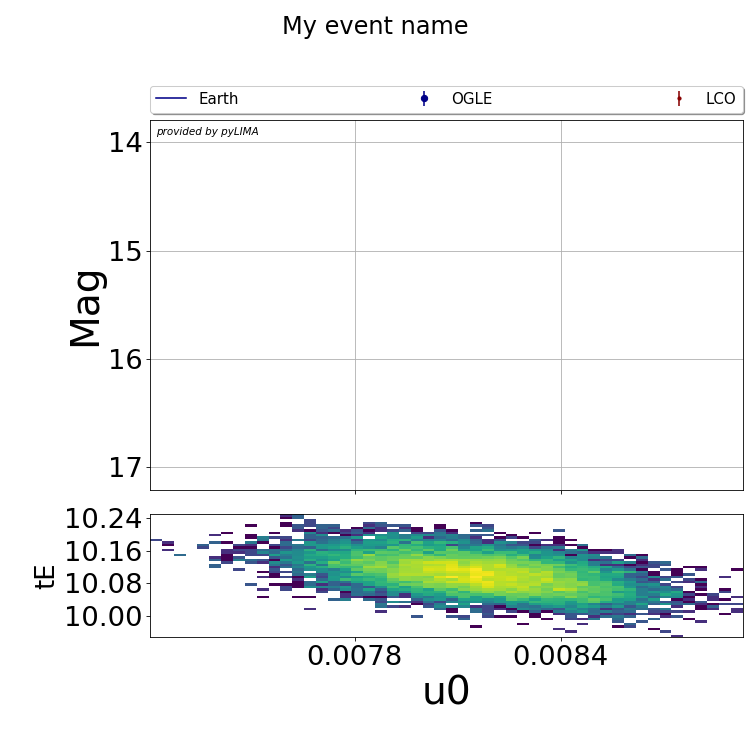

In [29]:
plt.hist2d(MCMC_results[1000:,:,1].ravel(),MCMC_results[1000:,:,2].ravel(), norm=LogNorm(), bins=50)
plt.xlabel('u0')
plt.ylabel('tE')
plt.show()


You can consult the matplotlib.pyplot.hist2d documentation to see additional arguments.

This concludes tutorial 1.